# What makes a game succeed?


Online store Ice sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. 

In this project we're going to identify patterns that determine whether a game succeeds or not. This will allow us to spot potential big winners and plan advertising campaigns for 2017.

## Data overview

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
!pip install sidetable
import sidetable


In [2]:
# loading data file
df = pd.read_csv('/datasets/games.csv')

In [3]:
# printing the general info about the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Data frame contains 11 columns:
- `'Name'`

- `'Platform'`

- `'Year_of_Release'`

- `'Genre'`

- `'NA_sales'`— (North American sales in USD million)

- `'EU_sales'`— (sales in Europe in USD million)

- `'JP_sales'`— (sales in Japan in USD million)

- `'Other_sales'`— (sales in other countries in USD million)

- `'Critic_Score'`— (maximum of 100)

- `'User_Score'`— (maximum of 10)

- `'Rating'`— (ESRB)

In [4]:
# printing a sample of data
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


There are missing values in Name, Year_of_Release, Genre, Critic_Score, User_Score and Rating columns that need further investigation.

In addition, all of the data frame's column names contain uppercase letters that will need to be changed to lowercase for more convenient analysis.

Year_of_Release has inappropriate data type for analysis that will need to be changed to integer data type.

## Data preprocessing

### Header style

In [5]:
# looking at the list of column names in the df table
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# renaming columns
df = df.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating',
        
    }
)

In [7]:
# checking result: the list of column names
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Missing values

In [8]:
# looking at the total number of missing values in all of the columns
df.stb.missing(style=True)

,missing,total,percent
critic_score,"8,578","16,715",51.32%
rating,"6,766","16,715",40.48%
user_score,"6,701","16,715",40.09%
year_of_release,269,"16,715",1.61%
name,2,"16,715",0.01%
genre,2,"16,715",0.01%
platform,0,"16,715",0.00%
na_sales,0,"16,715",0.00%
eu_sales,0,"16,715",0.00%
jp_sales,0,"16,715",0.00%


In [9]:
# looking at missing values in name column
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We can see that these are the same rows, where we have 2 missing values in genre column as well. We can remove these rows from the data frame since it is impossible to identify these games.

In [10]:
# removing these 2 rows with missing values since it is impossible to identify these games
df = df.dropna(subset=['name','genre']).reset_index(drop=True)

In [11]:
# looking at data sample of missing values in year_of_release column
df[df['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
718,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
804,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [12]:
# checking rows, which include year in game title
df.query('name.str.contains("20") and year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1649,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2491,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2571,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3485,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4774,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5155,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5335,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [13]:
# replacing missing values in year_of_release column with minimum year value based on game
# df['year_of_release'] = df['year_of_release'].fillna(df.groupby(['name'])['year_of_release'].transform('min'))

We could replace missing values in year of release column with minimum year based on game title as for some of these games this works well and matches the release year exactly or is close enough, but since it might and does not work for every single game, it seems it might be better to leave this column as is - the amount of missing values is not that high and values in these columns contain sensible data.

In [14]:
# looking at unique values in user_score
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
# replacing 'tbd' values with 'NaN'
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [16]:
# looking at unique values in critic_score
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

'tbd' values in user_score were replaced with 'NaN' since we cannot estimate the scores for these games.

It seems we should not replace missing values in both, user_score and critic_score, columns since it is impossible to estimate scores and these values do not depend on any other parameter, e.g., platform, year, genre etc.

In [17]:
# looking at unique values in rating column
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# filling missing values in rating column with maximum rating value based on game
df['rating'] = df.groupby(['name'])['rating'].transform(lambda grp: grp.fillna(grp.mode().max()))

In [19]:
# filling remaining missing values in rating column with 'unknown'
df['rating'].fillna('unknown', inplace=True)

In [20]:
# looking at missing values after changes were made
df.stb.missing(style=True)

,missing,total,percent
user_score,"9,123","16,713",54.59%
critic_score,"8,576","16,713",51.31%
year_of_release,269,"16,713",1.61%
name,0,"16,713",0.00%
platform,0,"16,713",0.00%
genre,0,"16,713",0.00%
na_sales,0,"16,713",0.00%
eu_sales,0,"16,713",0.00%
jp_sales,0,"16,713",0.00%
other_sales,0,"16,713",0.00%


### Fixing data

In [21]:
# checking data types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [22]:
# fixing data types in year_of_release and user_score columns for more convenient analysis
df['year_of_release'] = df['year_of_release'].astype("Int64")
df['user_score'] = df['user_score'].astype('float64')

### Aggregating data

In [23]:
# Adding total_sales column to the table
df['total_sales']=df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16709,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16710,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16711,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,unknown,0.01


A new column was added to the data frame - the total sales (the sum of sales in all regions) for each game.

## Studying the data

In [24]:
games = df.groupby(['year_of_release'])['name'].nunique().reset_index().sort_values(by='year_of_release')
games

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


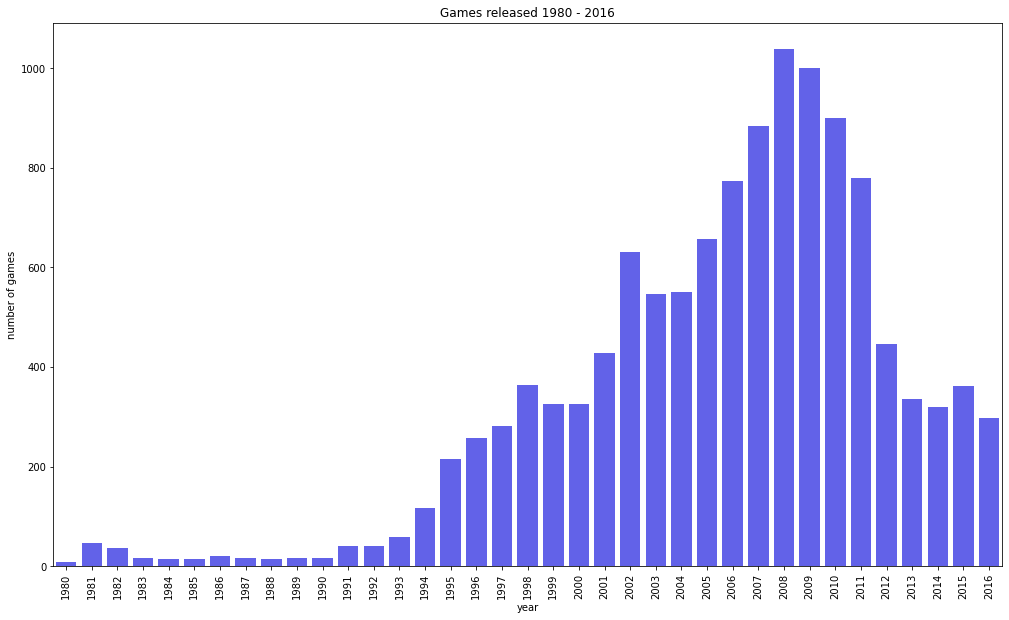

In [25]:
# building a bar chart of number of games released throughout years
games_released = df.groupby(['year_of_release'])['name'].nunique().reset_index().sort_values(by='year_of_release').reset_index()
plt.figure(figsize=(17,10))
sns.barplot(data = games_released, x='year_of_release', y='name', color='blue', alpha=0.7)
plt.title('Games released 1980 - 2016')
plt.xlabel('year')
plt.ylabel('number of games')
plt.xticks(rotation=90);

The 1980s were the early days of the video game industry, and the number of games released each year was relatively low compared to later decades.

The 1990s were a decade of noticeable growth for the video game industry, with a higher increase in the number of games being released each year.

The 2000s saw continued growth in the video game industry, with an even greater number of games being released each year than in the previous decade.

This most likely was due to the widespread adoption of the internet and digital distribution, which made it easier for developers to release games without the need for physical distribution.

It seems in the 2010s there was a decline in the number of games being released each year compared to the previous decade. However, it appears this was still a very active period for the industry.

Overall, the number of video games released each decade has shown a clear trend of growth and expansion.

In [26]:
sales = df[['platform','total_sales']].groupby(['platform']).sum().sort_values(by='total_sales', ascending = False).reset_index()
sales

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [27]:
# looking at sales throughout years on diff platforms 
sales_years = df.pivot_table(index='year_of_release', columns='platform', values='total_sales')
df.query('platform == "DS"').sort_values(by='year_of_release', ascending=True)
# replacing release year to 2004 for Strongest Tokyo University Shogi DS game
df.at[15955,'year_of_release'] = 2004

In [28]:
df.query('platform == "DS"').sort_values(by='year_of_release', ascending=True).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15955,Strongest Tokyo University Shogi DS,DS,2004,Action,0.00,0.00,0.02,0.0,NaN,NaN,unknown,0.02
13462,Cocoto Kart Racer,DS,2004,Racing,0.04,0.00,0.00,0.0,NaN,NaN,E,0.04
11516,Kenshuui Tendo Dokuta,DS,2004,Simulation,0.00,0.00,0.08,0.0,NaN,NaN,unknown,0.08
4420,The Urbz: Sims in the City (all regions sales),DS,2004,Simulation,0.40,0.01,0.02,0.0,NaN,NaN,unknown,0.43
7901,Daigasso! Band Brothers,DS,2004,Misc,0.00,0.00,0.19,0.0,NaN,NaN,unknown,0.19


While working with data, an error was found in one of the rows. DS platform was not around in 1985. Strongest Tokyo University Shogi DS was released in 2004, not 1985 - the value in year of release for this game was changed.

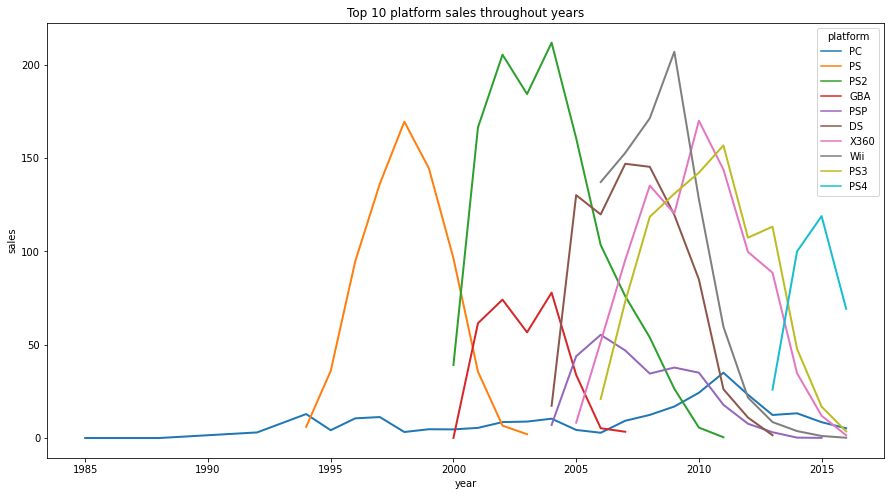

In [29]:
# building a graph of top 10 highest sales platforms
top_ten_platforms = sales['platform'].head(10)
platform_sales = df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')
top_ten = platform_sales.query('platform in @top_ten_platforms')
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=top_ten, x="year_of_release", y="total_sales",hue="platform", linewidth=2)
plt.title('Top 10 platform sales throughout years')
plt.xlabel('year')
plt.ylabel('sales');

From the graph of top 10 biggest selling platforms, we can observe that majority of these platforms have had a rampant, rapid growth in sales.

In some cases, once a new platform appears on the market, the older ones start to decline, e.g., PS sales went down once PS2 appeared and its growth was very steep.

X360 and PS3 appeared around the same time, both had speedy growth in sales and a similar decline.

It seems that between 2010 - 2012 sales for several platforms (Wii, X360, PS3) were decreasing possibly due to rise and popularity in mobile games.

PC as a platform for games has remained all these years with fewer ups and downs and noticeably less sales than the rest of the platforms. Sales in PC games had a slight rise around 2007 until 2012, that, perhaps, could be explained due to rise in video game streaming and games not being anymore as easily pirated as compared to earlier years.

In [30]:
# calculating platform age, taking into account platforms that were present or appeared after 2002,
# disregarding earlier platforms
after_2002 = df[df.year_of_release>=2002]
after_2002 = after_2002.groupby(['platform'])['year_of_release'].agg(['min','max']).reset_index()
after_2002['age'] = (after_2002['max'] - after_2002['min']) + 1
after_2002.sort_values(by='min')

,platform,min,max,age
8,PS2,2002,2011,10
1,DC,2002,2008,7
3,GBA,2002,2007,6
4,GC,2002,2007,6
5,N64,2002,2002,1
6,PC,2002,2016,15
7,PS,2002,2003,2
16,XB,2002,2008,7
2,DS,2004,2013,10
11,PSP,2004,2015,12


In [31]:
after_2002['age'].describe()

count    18.000000
mean      7.500000
std       3.807887
min       1.000000
25%       5.250000
50%       6.500000
75%      10.750000
max      15.000000
Name: age, dtype: float64

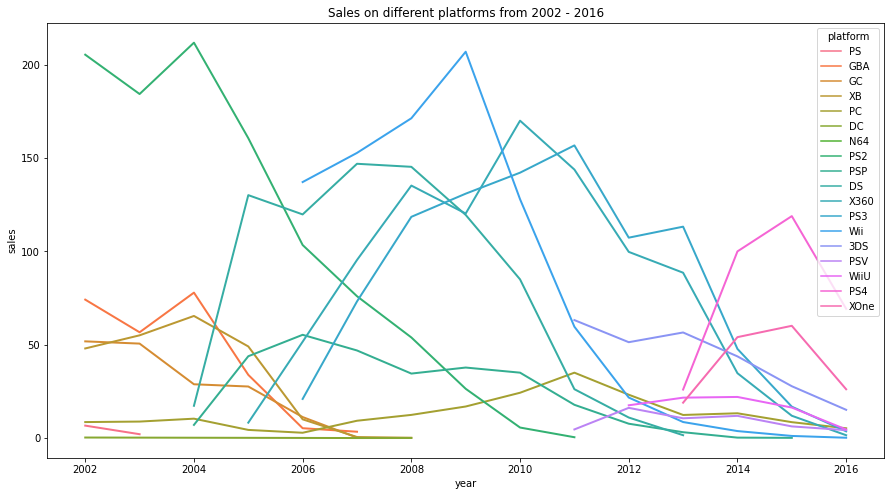

In [32]:
# building a graph of platforms that were released after 2002
after_2002_sales = df[df.year_of_release>=2002]
after_2002_sales = after_2002_sales.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index().sort_values(by='year_of_release')

plt.figure(figsize=(15,8))
ax = sns.lineplot(data = after_2002_sales, x = "year_of_release", y="total_sales",hue="platform", linewidth=2)
plt.title('Sales on different platforms from 2002 - 2016')
plt.xlabel('year')
plt.ylabel('sales');

From 18 platforms (starting from 2002), we have 9 that are still present in 2016.

Since late 2013, 2 new platforms appeared, PS4 and XOne. For both sales went up until approx. mid 2015.

Median platform age is 7 years.

Sales have not returned to be as high as they were once for PS2 or Wii. Closest to that were X360 and PS3, however, sales generally are lower for all of the platforms, compared to PS2 and Wii peaks, one of the reasons might be time spent on mobile device - either mobile gaming, social media etc.

In [33]:
data = df[df.year_of_release>=2013]
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [34]:
data_sales = data.groupby(['platform','name'])['total_sales'].sum().reset_index()
order = data_sales.groupby(['platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales')['platform']
data_sales.head()

,platform,name,total_sales
0,3DS,Beyblade Burst,0.03
1,3DS,Fire Emblem Fates,1.67
2,3DS,Frozen: Olaf's Quest,0.59
3,3DS,Haikyu!! Cross Team Match!,0.04
4,3DS,12-Sai. Honto no Kimochi,0.07


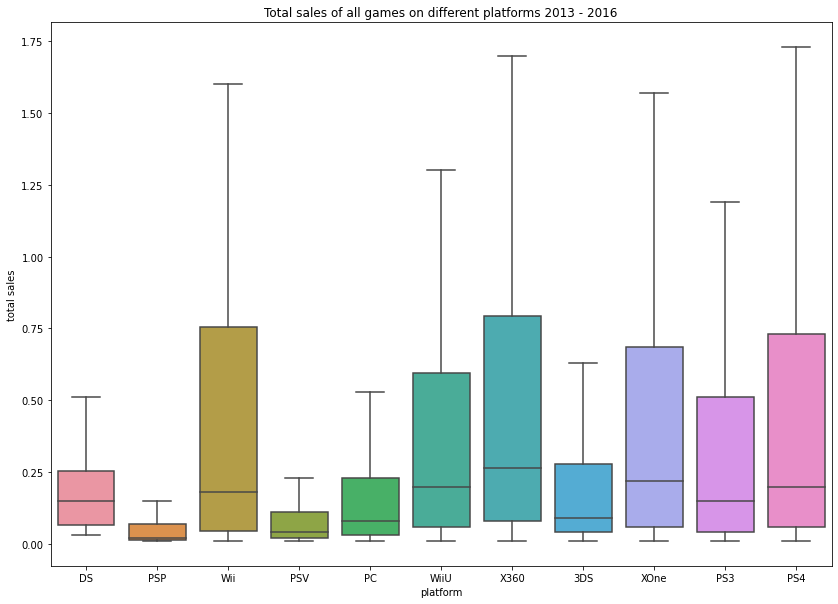

In [35]:
# building a boxplot for total sales of all games by different platforms
plt.figure(figsize=(14,10))
sns.boxplot(x = 'platform', y ='total_sales',data = data_sales, order = order, showfliers = False)
plt.title('Total sales of all games on different platforms 2013 - 2016')
plt.xlabel('platform')
plt.ylabel('total sales');

In [36]:
# looking at distribution of total sales values on each platform
data_sales.groupby(['platform']).describe()

total_sales                                                        
               count      mean       std   min     25%    50%     75%    max
platform                                                                    
3DS            303.0  0.472772  1.381347  0.01  0.0400  0.090  0.2800  14.60
DS               8.0  0.192500  0.172026  0.03  0.0675  0.150  0.2525   0.51
PC             189.0  0.208624  0.352304  0.01  0.0300  0.080  0.2300   3.05
PS3            345.0  0.525884  1.451939  0.01  0.0400  0.150  0.5100  21.05
PS4            392.0  0.801378  1.609456  0.01  0.0600  0.200  0.7300  14.63
PSP             67.0  0.052239  0.059768  0.01  0.0150  0.020  0.0700   0.24
PSV            358.0  0.092151  0.153816  0.01  0.0200  0.040  0.1100   1.96
Wii             23.0  0.593913  0.915432  0.01  0.0450  0.180  0.7550   3.58
WiiU           115.0  0.562000  1.038778  0.01  0.0600  0.200  0.5950   7.09
X360           186.0  0.735484  1.663275  0.01  0.0800  0.265  0.7950  16.27
XOne           247.0  0.645020  1.036139  0.01  0.0600  0.220  0.6850   7.39

The platforms with the highest median total sales are X360, XOne, WiiU, PS4, and Wii, which suggests that these platforms have been more successful in terms of sales compared to others.

On the other hand, the platforms with the lowest median total sales are PSP and 3DS, indicating that these platforms have not been as popular or successful in the period from 2013 - 2016.

The ranking of platforms based on total sales is similar to the ranking based on median values. The platforms with the highest total sales are PS4, PS3, XOne, 3DS, and X360, while the platforms with the lowest sales are DS, PSP, and Wii.

We can see that the more successful platforms tend to have higher median and mean values, as well as a wider range of sales values.

In [37]:
# creating a function that plots a scatterplot of platform's total sales by score 
# and calculates correlation between two sets of data - score and total sales

def score_effect(platform, score_type):
    platform_data = data[(data.platform == platform) & (data[score_type].notna())][['total_sales', score_type]]
    platform_data.plot(x=score_type, y='total_sales', kind='scatter', grid=True, figsize=(8,8))
    plt.title(f'{platform} total sales by {score_type.replace("_", " ")}')
    plt.xlabel('score')
    plt.ylabel('total sales')
    correlation = platform_data[score_type].corr(platform_data['total_sales'])
    if correlation > 0.5:
        return f'{correlation}: there is a positive relationship between {score_type.replace("_", " ")} and {platform} total sales'
    if correlation < -0.5:
        return f'{correlation}: there is a negative relationship between {score_type.replace("_", " ")} and {platform} total sales'
    else:
        return f'{correlation}: there is no significant relationship between {score_type.replace("_", " ")} and {platform} total sales'
    

In [38]:
platforms = ['XOne','X360','PS4', 'WiiU']
score_types = ['user_score','critic_score']
#print(score_effect(platforms[0], score_types[0]))

-0.06892505328279414: there is no significant relationship between user score and XOne total sales
0.4169983280084017: there is no significant relationship between critic score and XOne total sales
-0.011742185147181342: there is no significant relationship between user score and X360 total sales
0.3503445460228664: there is no significant relationship between critic score and X360 total sales
-0.031957110204556424: there is no significant relationship between user score and PS4 total sales
0.40656790206178095: there is no significant relationship between critic score and PS4 total sales
0.4193304819266187: there is no significant relationship between user score and WiiU total sales
0.3764149065423912: there is no significant relationship between critic score and WiiU total sales


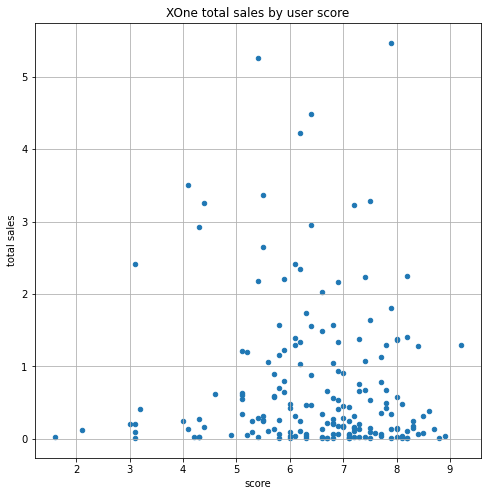

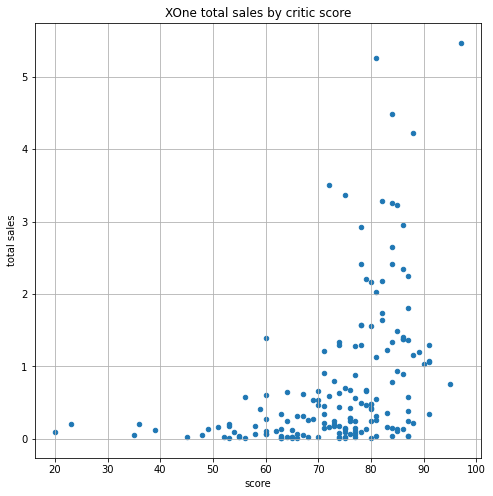

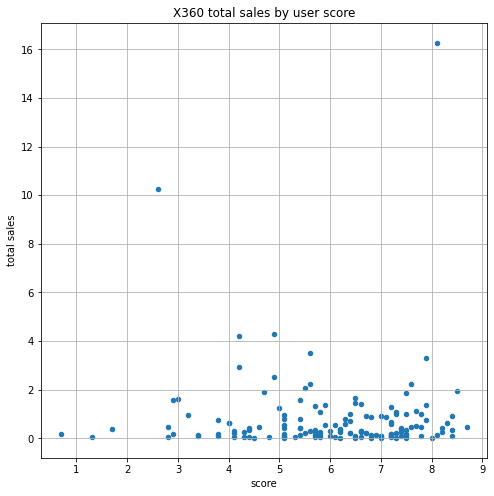

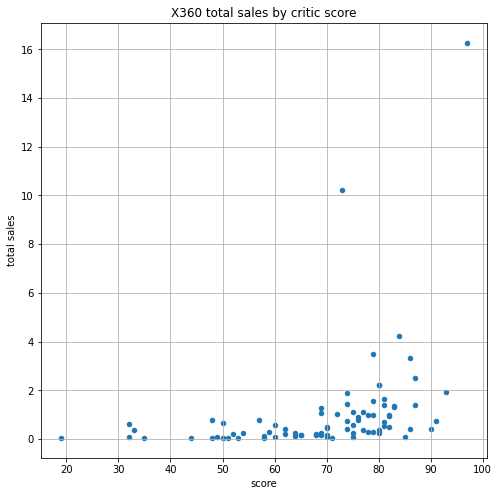

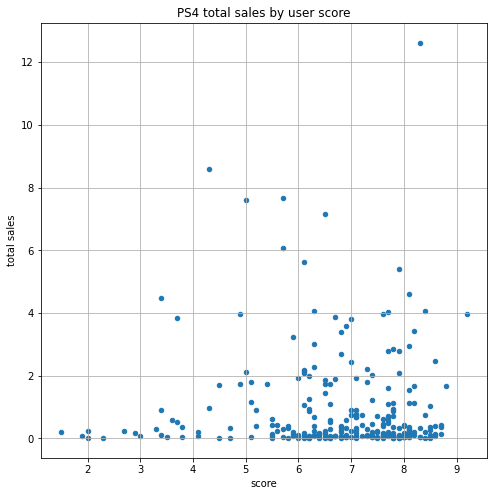

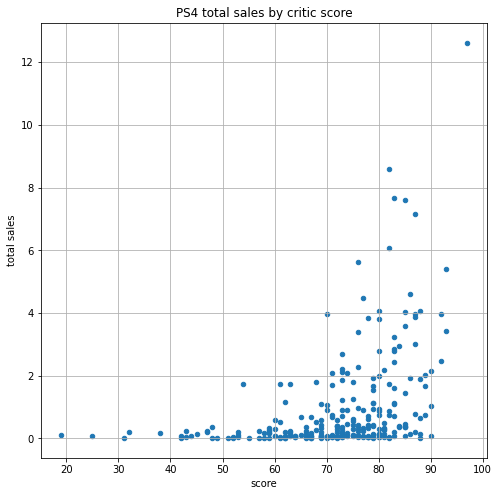

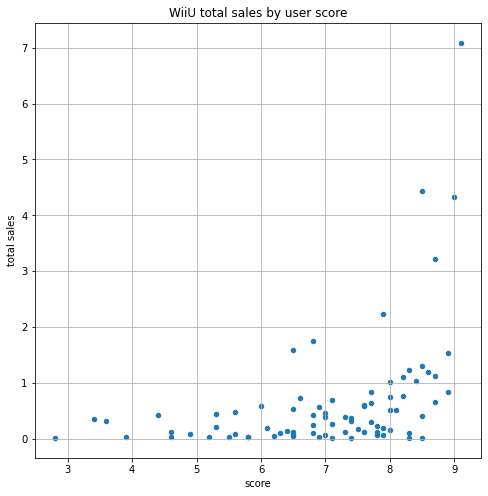

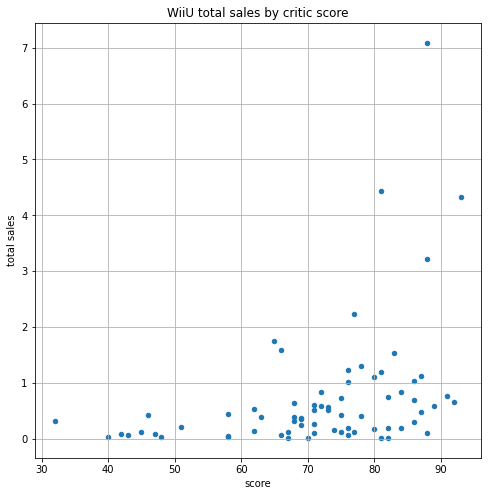

In [39]:
# writing a loop that will return a scatterplot for each platform and score type
for i in platforms:
    for x in score_types:
        print(score_effect(i, x))

It appears that both, user score and critic score, has no significant effect on total sales for the 4 most profitable platforms - XOne, X360, PS4 and Wiiu.

In [40]:
# looking at the most profitable genres
data.groupby(['genre'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending = False)

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


In [41]:
# looking at shares of total sales of each genre
genres = (data.groupby(['genre'])['total_sales'].sum()/data['total_sales'].sum()).reset_index().sort_values(by='total_sales',ascending=False)
genres.style.format({'total_sales': "{:,.2%}".format})

,genre,total_sales
0,Action,29.51%
8,Shooter,21.36%
10,Sports,13.81%
7,Role-Playing,13.38%
3,Misc,5.76%
4,Platform,3.91%
6,Racing,3.66%
2,Fighting,3.24%
1,Adventure,2.17%
9,Simulation,2.00%


It appears that worldwide most profitable genres are Action, Shooter, Sports and Role-Playing, while rest of the genres, especially, Puzzle, Strategy, Simulation and Adventure, had low sales.

## Analysis per region

In [42]:
# looking at top 5 selling platforms in NA (in 2013 - 2016)
na = (data.groupby(['platform'])['na_sales'].sum()/data['na_sales'].sum()).reset_index().sort_values(by='na_sales',ascending=False)
na.head().style.format({'na_sales': "{:,.2%}".format})

,platform,na_sales
4,PS4,24.84%
10,XOne,21.27%
9,X360,18.66%
3,PS3,14.51%
0,3DS,8.73%


In [43]:
na_head = na.head()
na_head.loc[len(na_head.index)] = {'platform': 'Others', 'na_sales': 1 - na_head['na_sales'].sum()}

In [44]:
# looking at top 5 selling platforms in EU
eu = (data.groupby(['platform'])['eu_sales'].sum()/data['eu_sales'].sum()).reset_index().sort_values(by='eu_sales',ascending=False)
eu.head().style.format({'eu_sales': "{:,.2%}".format})

,platform,eu_sales
4,PS4,35.97%
3,PS3,17.29%
10,XOne,13.15%
9,X360,10.84%
0,3DS,7.89%


In [45]:
eu_head = eu.head()
eu_head.loc[len(eu_head.index)] = {'platform': 'Others', 'eu_sales': 1 - eu_head['eu_sales'].sum()}

In [46]:
# looking at top 5 selling platforms in JP
jp = (data.groupby(['platform'])['jp_sales'].sum()/data['jp_sales'].sum()).reset_index().sort_values(by='jp_sales',ascending=False)
jp.head().style.format({'jp_sales': "{:,.2%}".format})

,platform,jp_sales
0,3DS,48.17%
3,PS3,16.59%
6,PSV,13.21%
4,PS4,11.34%
8,WiiU,7.73%


In [47]:
jp_head = jp.head()
jp_head.loc[len(jp_head.index)] = {'platform': 'Others', 'jp_sales': 1 - jp_head['jp_sales'].sum()}

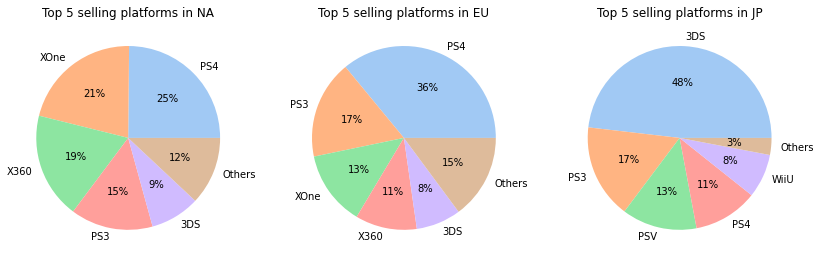

In [48]:
# building a grouped pie chart of top 5 platforms in each region
fig, axs = plt.subplots(1, 3, figsize=(14,14))
colors = sns.color_palette('pastel')[0:6]

axs[0].pie(na_head['na_sales'], labels = na_head['platform'], autopct='%.0f%%', colors=colors)
axs[0].set_title('Top 5 selling platforms in NA')

axs[1].pie(eu_head['eu_sales'], labels = eu_head['platform'], autopct='%.0f%%', colors=colors)
axs[1].set_title('Top 5 selling platforms in EU')

axs[2].pie(jp_head['jp_sales'], labels = jp_head['platform'], autopct='%.0f%%', colors=colors)
axs[2].set_title('Top 5 selling platforms in JP');

Most sales between 2013 - 2016 in North America have come from PS4 games.  
In the EU the same 5 platforms have been leading as in North America.  
It seems Japan has different preferences when it comes to gaming, their most loved platform is 3DS, which makes nearly half of Japan's total sales from 2013 - 2016. In addition, PSV and WiiU has made into Japan's top 5, unlike in North America or Europe.

In [49]:
# looking at genres that have made most sales in NA
na_genres = data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_genres.head()

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


In [50]:
# adding a row that includes the rest of genres for the pie chart
na_genres_head = na_genres.head()
na_genres_head.loc[len(na_genres_head.index)] = {'genre': 'Others', 'na_sales': na_genres['na_sales'].sum() - na_genres_head['na_sales'].sum()}

In [51]:
# looking at genres that have made most sales in EU
eu_genres = data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_genres.head()

,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


In [52]:
# adding a row that includes the rest of genres for the pie chart
eu_genres_head = eu_genres.head()
eu_genres_head.loc[len(eu_genres_head.index)] = {'genre': 'Others', 'eu_sales': eu_genres['eu_sales'].sum() - eu_genres_head['eu_sales'].sum()}

In [53]:
# looking at genres that have made most sales in JP
jp_genres = data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_genres.head()

,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


In [54]:
# adding a row that includes the rest of genres for the pie chart
jp_genres_head = jp_genres.head()
jp_genres_head.loc[len(jp_genres_head.index)] = {'genre': 'Others', 'jp_sales': jp_genres['jp_sales'].sum() - jp_genres_head['jp_sales'].sum()}

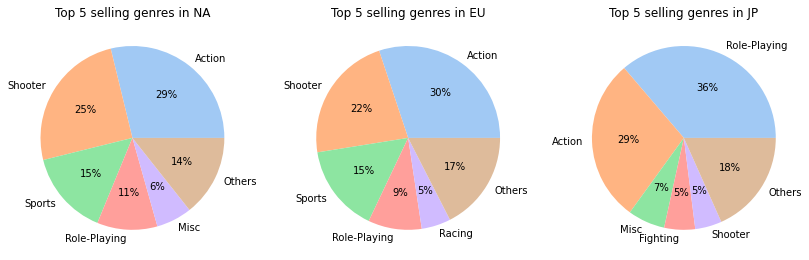

In [55]:
# building a grouped pie chart of top 5 genres in each region
fig, axs = plt.subplots(1, 3, figsize=(14,14))
colors = sns.color_palette('pastel')[0:6]

axs[0].pie(na_genres_head['na_sales'], labels = na_genres_head['genre'], autopct='%.0f%%', colors=colors)
axs[0].set_title('Top 5 selling genres in NA')

axs[1].pie(eu_genres_head['eu_sales'], labels = eu_genres_head['genre'], autopct='%.0f%%', colors=colors)
axs[1].set_title('Top 5 selling genres in EU')

axs[2].pie(jp_genres_head['jp_sales'], labels = jp_genres_head['genre'], autopct='%.0f%%', colors=colors)
axs[2].set_title('Top 5 selling genres in JP');


The top 4 most common game genres (in 2013 - 2016) in North America and EU are the same - Action, Shooter, Sports and Role-Playing, however in NA Miscellanious games take the 5th place and in EU it's Racing games.  
When it comes to Japan, the most popular genres are Role-Playing, Action, Miscellanious, Fighting and Shooter.

In [56]:
# looking at sales in NA based on ESRB ratings
na_rating = data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_ratio = (data.groupby(['rating'])['na_sales'].sum()/data['na_sales'].sum()).reset_index().sort_values(by='na_sales',ascending=False)
na_rating['ratio'] = na_ratio['na_sales']
na_rating.style.format({'ratio': "{:,.2%}".format})

,rating,na_sales,ratio
2,M,175.100000,40.00%
0,E,81.660000,18.66%
4,unknown,72.540000,16.57%
1,E10+,56.430000,12.89%
3,T,51.980000,11.88%


In [57]:
# looking at sales in EU based on ESRB ratings
eu_rating = data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_ratio = (data.groupby(['rating'])['eu_sales'].sum()/data['eu_sales'].sum()).reset_index().sort_values(by='eu_sales',ascending=False)
eu_rating['ratio'] = eu_ratio['eu_sales']
eu_rating.style.format({'ratio': "{:,.2%}".format})

,rating,eu_sales,ratio
2,M,156.670000,39.94%
0,E,85.440000,21.78%
4,unknown,61.190000,15.60%
1,E10+,45.250000,11.54%
3,T,43.680000,11.14%


In [58]:
# looking at sales in JP based on ESRB ratings
jp_rating = data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_ratio = (data.groupby(['rating'])['jp_sales'].sum()/data['jp_sales'].sum()).reset_index().sort_values(by='jp_sales',ascending=False)
jp_rating['ratio'] = jp_ratio['jp_sales']
jp_rating.style.format({'ratio': "{:,.2%}".format})

,rating,jp_sales,ratio
4,unknown,80.820000,57.41%
3,T,22.840000,16.22%
0,E,15.980000,11.35%
2,M,14.870000,10.56%
1,E10+,6.270000,4.45%


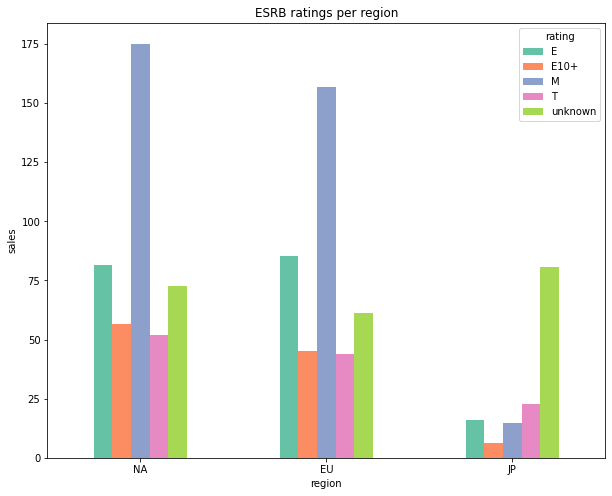

In [59]:
# building a grouped bar chart of total sales based on ESRB ratings in each region
colors = sns.color_palette('Set2')
labels = ['NA', 'EU', 'JP']
sale_sums = data.groupby(['rating']).sum()[["na_sales", "eu_sales", "jp_sales"]]
sale_sums.T.plot.bar(figsize = (10,8), color = colors)
plt.title('ESRB ratings per region')
plt.xlabel('region')
plt.ylabel('sales')
plt.xticks(np.arange(3), labels = labels, rotation = 0);

When we look at sales based on ESRB rating, for period of 2013 - 2016, North America and EU have very similar data, highest sales are for M rated games and E. E10+ and T rated games sell less.

In Japan, games with unknown ESRB rating have made 57% of sales, meanwhile E10+ the least amount of sales.

## Statistical hypothesis testing

H0: Average user ratings of the Xbox One and PC platforms are the same

Ha: Average user ratings of the Xbox One and PC platforms differ

In [60]:
# selecting rows that include XOne and PC platforms
xbox1 = df.query('platform == "XOne"')
pc = df.query('platform == "PC"')

In [61]:
# saving samples
sample01 = xbox1['user_score']
sample02 = pc['user_score']

In [62]:
sample01.var()

1.9069968429360695

In [63]:
sample02.var()

2.3407871413372066

In [64]:
# looking at the ratio of the larger sample variance to the smaller sample variance
sample02.var() / sample01.var()

1.227473002909255

In [65]:
# performing t-test
st.ttest_ind(sample01, sample02, nan_policy='omit', equal_var = True)

Ttest_indResult(statistic=-4.368333815003015, pvalue=1.3896435533548819e-05)

In [66]:
p_value = st.ttest_ind(sample01, sample02, nan_policy='omit').pvalue
p_value

1.3896435533548819e-05

In [67]:
# testing the null hypothesis
p_value = p_value
alpha = 0.05
print(p_value)
if p_value < alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same")

1.3896435533548819e-05
Reject H0: average of sample 1 is not equal to average of sample 2


H0: Average user ratings for the Action and Sports genres are equal

Ha: Average user ratings for the Action and Sports genres are different

In [68]:
# selecting rows that include action and sports genres
action = df.query('genre.str.contains("Action")')
sports = df.query('genre.str.contains("Sports")')

In [69]:
# saving samples
sample1 = action['user_score']
sample2 = sports['user_score']

In [70]:
sample1.var()

2.031746898033205

In [71]:
sample2.var()

2.596514718973004

In [72]:
sample2.var() / sample1.var()

1.2779715433484906

In [73]:
# performing t-test
st.ttest_ind(sample1, sample2, nan_policy='omit', equal_var = True)

Ttest_indResult(statistic=1.6259419280500702, pvalue=0.1040695135904947)

In [74]:
p_value = st.ttest_ind(sample1, sample2, nan_policy='omit').pvalue
p_value

0.1040695135904947

In [75]:
# testing the null hypothesis
p_value = p_value
alpha = 0.05
print(p_value)
if p_value < alpha:
    print('Reject H0: average of sample 1 is not equal to average of sample 2')
else:
    print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same")

0.1040695135904947
Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 and sample 2 are not the same


## Preparing the data for analysis
The data frame provided had missing values in several columns - name, year_of_release, genre, critic_score, user_score and rating.

2.6% (439 values) in rating column were replaced with rating based on game title.

2 rows with missing name and genre were removed from data set as it was impossible to identify these games.

'tbd' values in user_score were replaced with 'NaN' since we cannot estimate the scores for these games.

Missing values in year_of_release were left as they were to maintain the integrity and not distort the data.

In addition, missing values in both, user_score and critic_score columns were left as they were as well since there is no way for us to estimate these scores as these values do not depend on any other parameter, e.g., platform, year, genre etc.

While working with data, an error was found in one of the rows. DS platform was not around in 1985. Strongest Tokyo University Shogi DS was released in 2004, not 1985 - the value in year of release for this game was changed to 2004.

Lastly, a new column was added to the data frame - the total sales (the sum of sales in all regions) for each game.

## General conclusion

### Games throughout years
The 1980s were the early days of the video game industry, and the number of games released each year was relatively low compared to later decades.  
The 1990s were a decade of noticeable growth for the video game industry, with a higher increase in the number of games being released each year.  
The 2000s saw continued growth in the video game industry, with an even greater number of games being released each year than in the previous decade.  
This partially was due to the widespread adoption of the internet and digital distribution, which made it easier for developers to release games without the need for physical distribution.  
In the 2010s there was a decline in the number of games being released each year compared to the previous decade. However, it appears this was still a very active period for the industry.  
Overall, the number of video games released each decade has shown a clear trend of growth and expansion.  

### Top 10 highest selling platforms
From the graph of top 10 biggest selling platforms, we can observe that majority of these platforms have had a rampant, rapid growth in sales.  
In some cases, once a new platform appears on the market, the older ones start to decline, e.g., PS sales went down once PS2 appeared and its growth was very steep.  
X360 and PS3 appeared around the same time, both had speedy growth in sales and a similar decline.  
It seems that between 2010 - 2012 sales for several platforms (Wii, X360, PS3) were decreasing possibly due to rise and popularity in mobile games.  
PC as a platform for games has remained all these years with fewer ups and downs and noticeably less sales than the rest of the platforms. Sales in PC games had a slight rise around 2007 until 2012, that, perhaps, could be explained due to rise in video game streaming and games not being anymore as easily pirated as compared to earlier years.  


### Platforms during 2002 - 2016
From 18 platforms (starting from 2002), we have 9 that are still present in 2016.  
Since late 2013, 2 new platforms appeared, PS4 and XOne. For both sales went up until approx. mid 2015.  
Median platform age is 7 years.  
Sales have not returned to be as high as they were once for PS2 or Wii. Closest to that were X360 and PS3, however, sales generally are lower for all of the platforms, compared to PS2 and Wii peaks, one of the reasons might be time spent on mobile device - either mobile gaming, social media etc.

### Platforms during 2013 - 2016
To build a prognosis for 2017, we've worked with data from 2013 - 2016.  
The platforms with the highest median total sales are X360, XOne, WiiU, PS4, and Wii, which suggests that these platforms have been more successful in terms of sales compared to others.  
On the other hand, the platforms with the lowest median total sales are PSP and 3DS, indicating that these platforms have not been as popular or successful in the period from 2013 - 2016.  
The ranking of platforms based on total sales is similar to the ranking based on median values. The platforms with the highest total sales are PS4, PS3, XOne, 3DS, and X360, while the platforms with the lowest sales are DS, PSP, and Wii.  
The more successful platforms tend to have higher median and mean values, as well as a wider range of sales values.  

### Sales in different regions between 2013 - 2016
    
Most sales, 24.84%, in North America have come from PS4 games. XOne	- 21.27%, X360 - 18.65%, PS3 - 14.50%, 3DS - 8.73%.  
In the EU the same exact 5 platforms have been leading as in North America - PS4 with 35.93% of total sales in EU, PS3 - 17.27%, XOne - 13.14%, X360 - 10.83%, 3DS - 7.88%.  
It seems Japan has different preferences when it comes to gaming, their most loved platform has been 3DS, which makes nearly half of Japan's total sales from 2013 - 2016. In addition, PSV and WiiU has made into Japan's top 5, unlike in North America or Europe.  
The top 4 most common game genres (in 2013 - 2016) in North America and EU are the same - Action, Shooter, Sports and Role-Playing, however in NA Miscellanious games take the 5th place and in EU it's Racing games.  
In Japan, the most popular genres are Role-Playing, Action, Miscellanious, Fighting and Shooter.  
When we look at sales based on ESRB rating, for period of 2013 - 2016, North America and EU have very similar data, highest sales are for M rated games and E. E10+ and T rated games sell less.  
In Japan, games with unknown ESRB rating have made 57% of sales, meanwhile E10+ the least amount of sales.